In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/alfredthomas/Downloads/sustainable_fashion_trends_2024.csv')

In [5]:
df.head(10)

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
5,BRAND-0006,Brand_6,Italy,2017,B,Recycled Polyester,No,447.65,2244115.38,69017.63,Yes,10,196.45,Stable,B Corp
6,BRAND-0007,Brand_7,Australia,2015,A,Hemp,Yes,345.64,1020265.49,18373.35,No,17,376.14,Stable,GOTS
7,BRAND-0008,Brand_8,Brazil,2022,C,Tencel,No,336.70,3847649.16,28717.69,No,18,59.34,Declining,OEKO-TEX
8,BRAND-0009,Brand_9,France,2018,D,Recycled Polyester,Yes,386.68,1494891.28,45916.88,Yes,11,91.12,Declining,GOTS
9,BRAND-0010,Brand_10,India,2011,A,Bamboo Fabric,No,250.94,3892548.66,58636.15,No,9,426.55,Stable,NaN


In [ ]:
#Let check if there is any null or NaN value in the datasets 


In [7]:
df.isnull().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

In [ ]:
#in the column certification we have null values . let's check whare thoses values 


In [9]:
df.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [11]:
#replace NaN value in certification column by no certifcation 

data_cleaned=df.fillna(value='No certification')

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [ ]:
#now that the data is clean let's explaore the data using EDA

<Figure size 20000x5000 with 0 Axes>

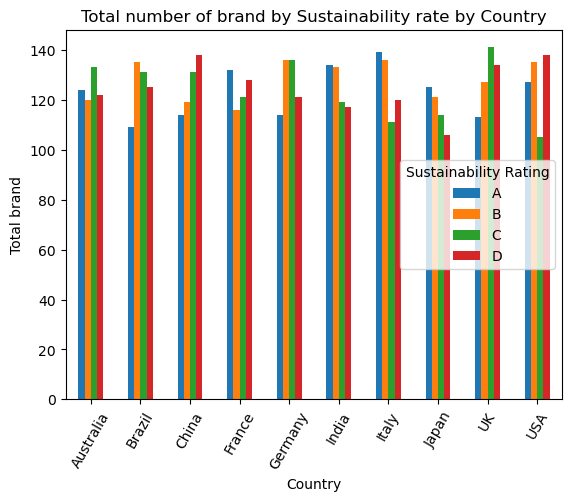

In [15]:
sus_rating = data_cleaned.pivot_table(index='Country', columns='Sustainability_Rating',values='Brand_ID',aggfunc='count')
plt.figure(figsize=(200,50))
sus_rating.plot.bar()
plt.title('Total number of brand by Sustainability rate by Country')
plt.xlabel("Country")
plt.ylabel("Total brand")
plt.legend(title="Sustainability Rating" , loc= 'center right')
plt.xticks(rotation=60)
plt.show()


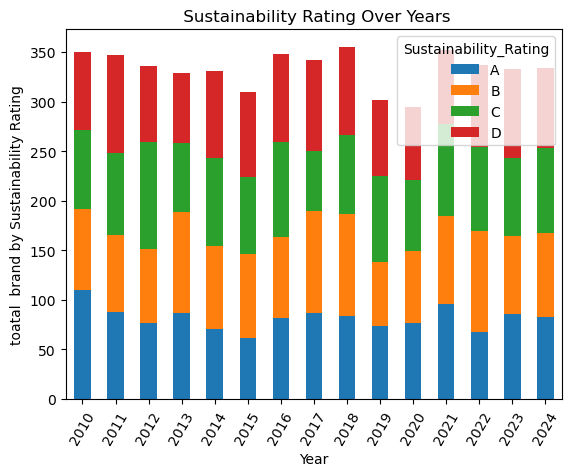

In [39]:
rating_over_years = df.groupby(['Year'])['Sustainability_Rating'].value_counts().unstack(fill_value=0)
rating_over_years.plot(kind='bar',stacked=True)
plt.title(' Sustainability Rating Over Years')
plt.xlabel('Year')
plt.ylabel('toatal  brand by Sustainability Rating')
plt.xticks(rotation=60)
plt.show()


<Figure size 20000x5000 with 0 Axes>

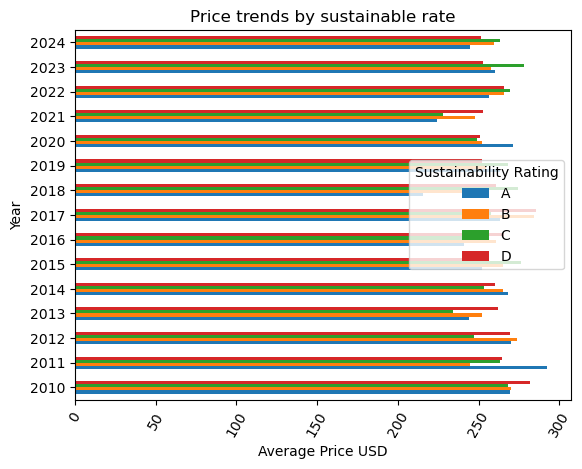

In [53]:
price_by_sus = data_cleaned.pivot_table(index='Year', columns='Sustainability_Rating',values='Average_Price_USD')
plt.figure(figsize=(200,50))
price_by_sus.plot.barh()
plt.title('Price trends by sustainable rate')
plt.xlabel("Average Price USD")
plt.ylabel("Year")
plt.legend(title="Sustainability Rating" , loc= 'center right')
plt.xticks(rotation=60)
plt.show()



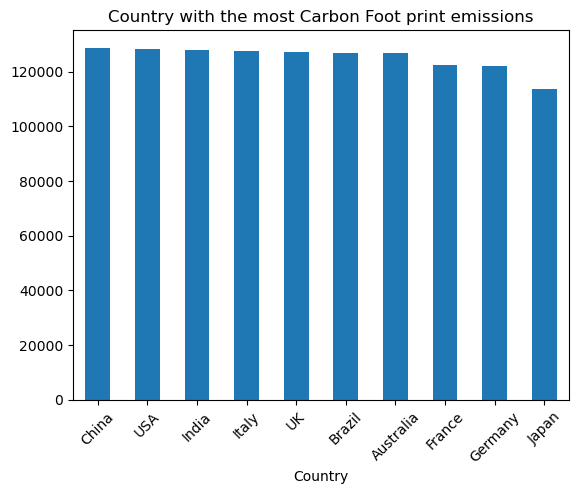

In [21]:
CF_emission = df.groupby('Country')['Carbon_Footprint_MT'].sum()
dis_emi = CF_emission.sort_values(ascending=False)
dis_emi.plot.bar()
plt.title('Country with the most Carbon Foot print emissions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

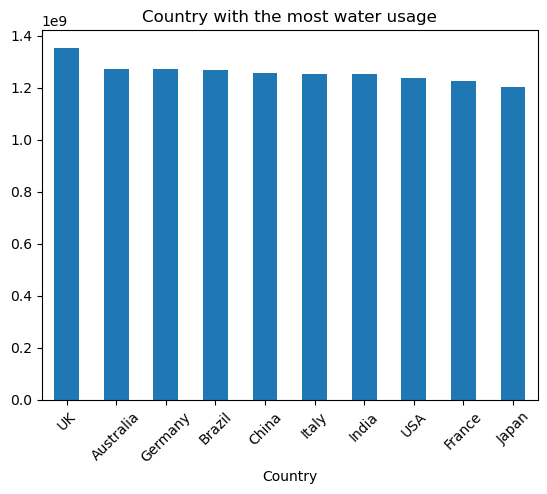

In [23]:
water_usage = df.groupby('Country')['Water_Usage_Liters'].sum()
dis_water = water_usage.sort_values(ascending=False)
dis_water.plot.bar()
plt.title('Country with the most water usage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

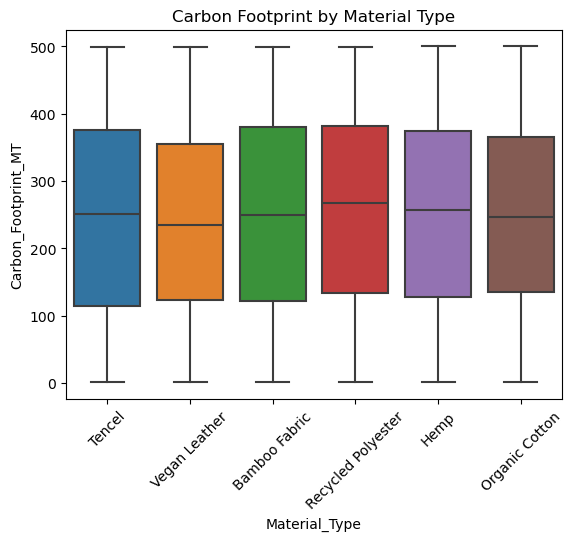

In [25]:
sns.boxplot(x='Material_Type', y='Carbon_Footprint_MT', data=data_cleaned)
plt.title('Carbon Footprint by Material Type')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

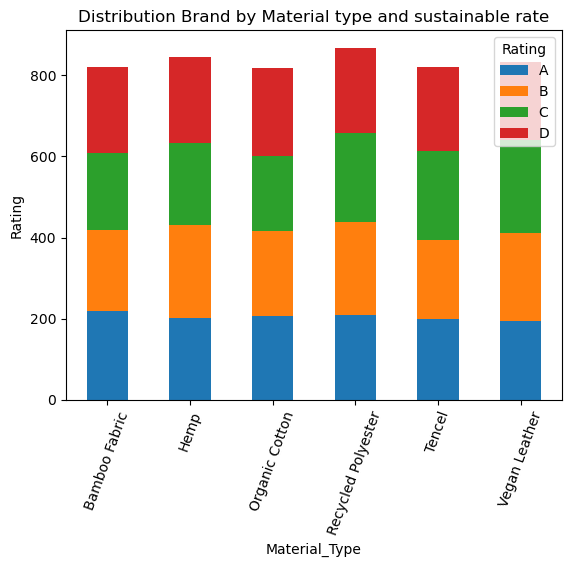

In [27]:
dist_material = data_cleaned.pivot_table(index='Material_Type', columns='Sustainability_Rating', values='Brand_ID', aggfunc='count')

plt.figure(figsize=(15, 8))
dist_material.plot.bar(stacked=True)
plt.title('Distribution Brand by Material type and sustainable rate')
plt.xlabel('Material_Type')
plt.ylabel('Rating')
plt.legend(title='Rating', loc='upper right')
plt.xticks(rotation=70)
plt.show()

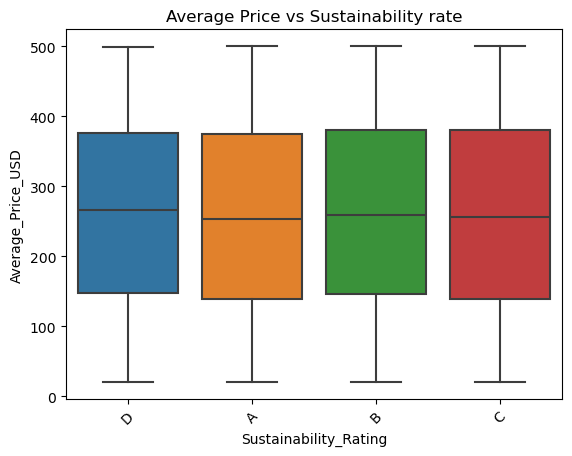

In [67]:
sns.boxplot(x='Sustainability_Rating', y='Average_Price_USD', data=data_cleaned)
plt.title('Average Price vs Sustainability rate')
plt.xticks(rotation=45)
plt.show()

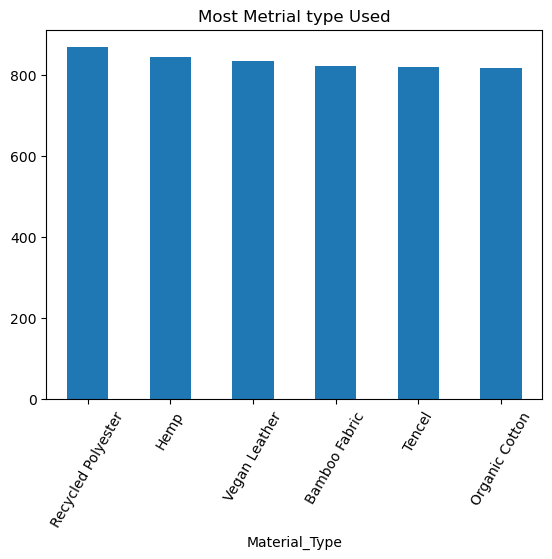

In [79]:
total_material = df.groupby('Material_Type')['Brand_ID'].count()
total = total_material.sort_values(ascending=False)
total.plot.bar()
plt.title('Most Metrial type Used')
plt.xticks(rotation=60)  # Rotate x-axis labels for better visibility
plt.show()

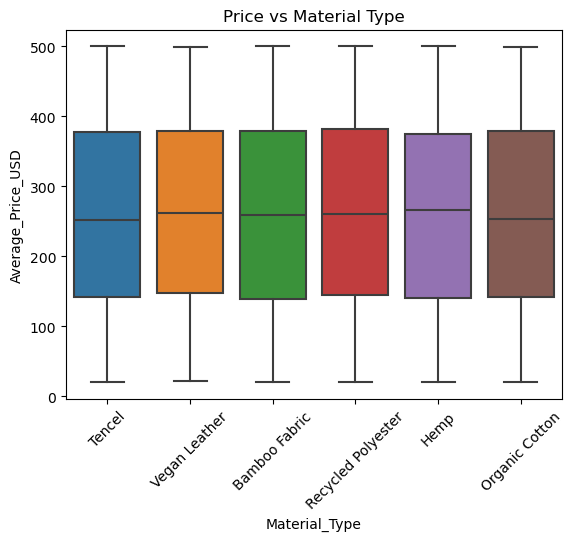

In [93]:
sns.boxplot(x='Material_Type', y='Average_Price_USD', data=df)
plt.title("Price vs Material Type")
plt.xticks(rotation=45)
plt.show()


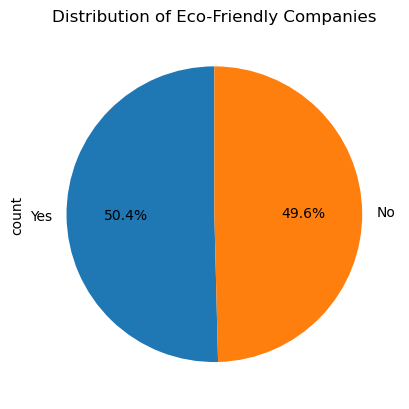

In [29]:
eco_friendly_count = df['Eco_Friendly_Manufacturing'].value_counts()
plot = eco_friendly_count.plot.pie(autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Eco-Friendly Companies')
plt.show()

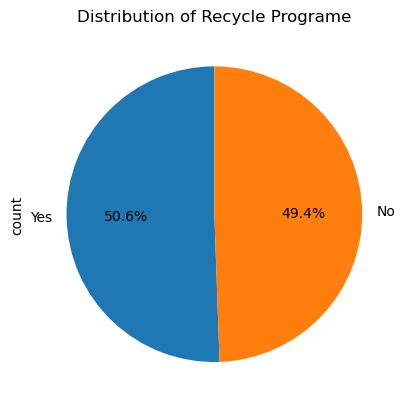

In [57]:
dist_recy = df['Recycling_Programs'].value_counts()
plot = dist_recy.plot.pie(autopct='%1.1f%%',startangle=90) 
plt.title('Distribution of Recycle Programe')
plt.show()


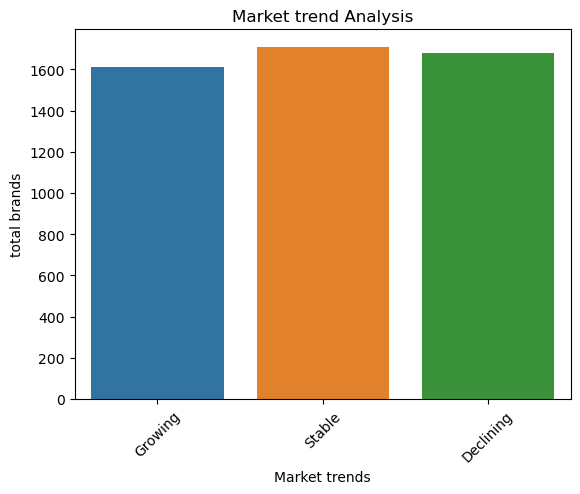

In [33]:
sns.countplot(data=df, x='Market_Trend')

# Customize the plot
plt.title('Market trend Analysis')
plt.xlabel('Market trends')
plt.ylabel('total brands')
plt.xticks(rotation=45)

# Show the plot
plt.show()